# Sitzung 2
## Aufgabe  5-29

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [24]:
X1 = np.array([1, 2])
X2 = np.array([1, 2, 3])
X1X2 = np.array([[0.1, 0.3, 0.2], 
                 [0.1, 0.1, 0.2]])

Text(0.5, 0.92, 'Gemeinsame Wahrscheinlichkeit von $X_1$ und $X_2$')

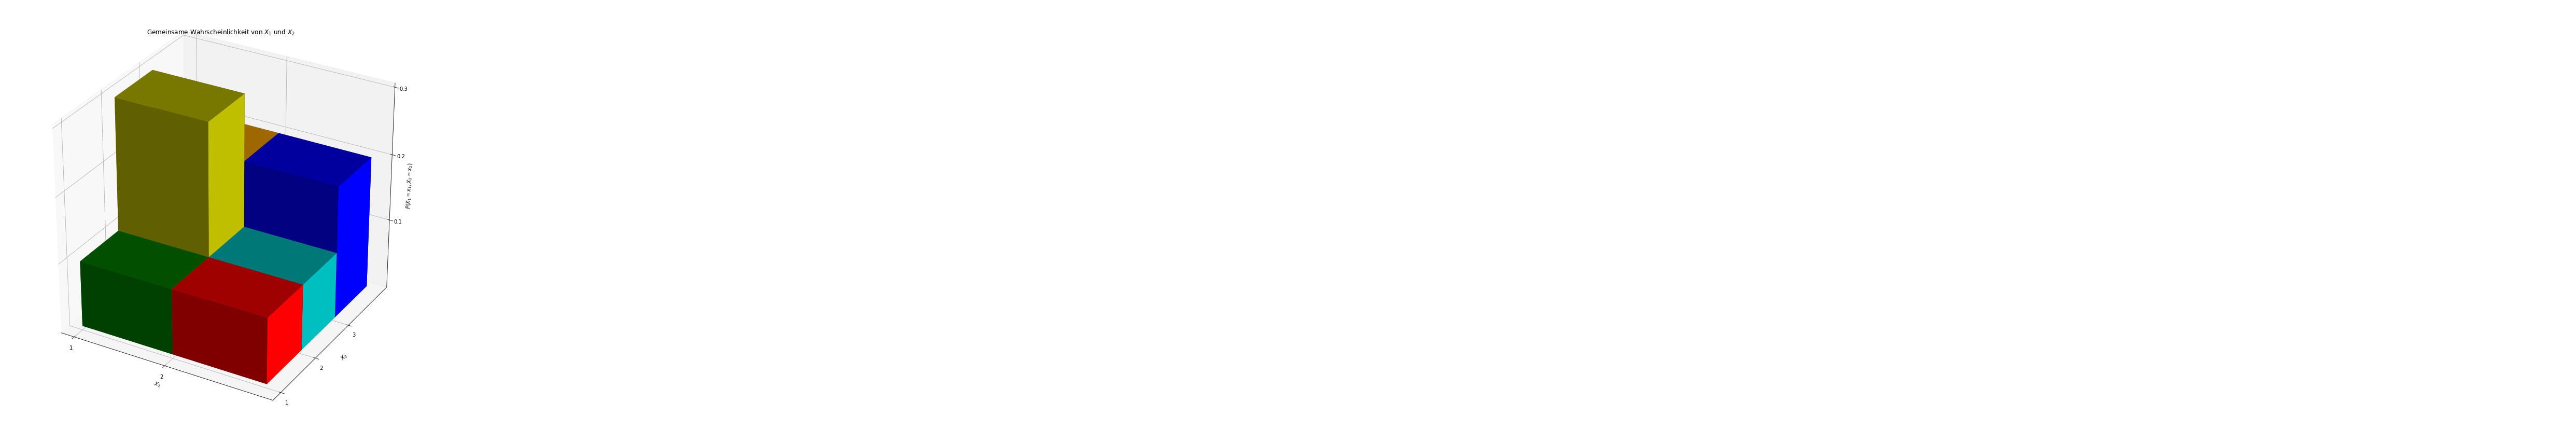

In [32]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

_x, _y = np.meshgrid(X1, X2)
x, y = _x.ravel(), _y.ravel()
top = X1X2.T.ravel()

ax.bar3d(x, y, np.zeros(6), 1, 1, top, color=["g", "r", "y", "c", "orange", "b"], shade=True)
ax.set_xticks([1, 2])
ax.set_yticks([1, 2, 3])
ax.set_zticks([0.1, 0.2, 0.3])
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$P(X_1 = x_1, X_2 = x_2)$")
ax.set_title("Gemeinsame Wahrscheinlichkeit von $X_1$ und $X_2$")

## Aufgabe 5-30

In [33]:
X1 = np.array([1, 2, 4])
X2 = np.array([1, 2, 3])
X1X2 = np.array([[0.1, 0.1, 0.2],
                 [0.2, 0.1, 0.1],
                 [0.1, 0, 0.1]])

Text(0.5, 0.92, 'Gemeinsame Wahrscheinlichkeit von $X_1$ und $X_2$')

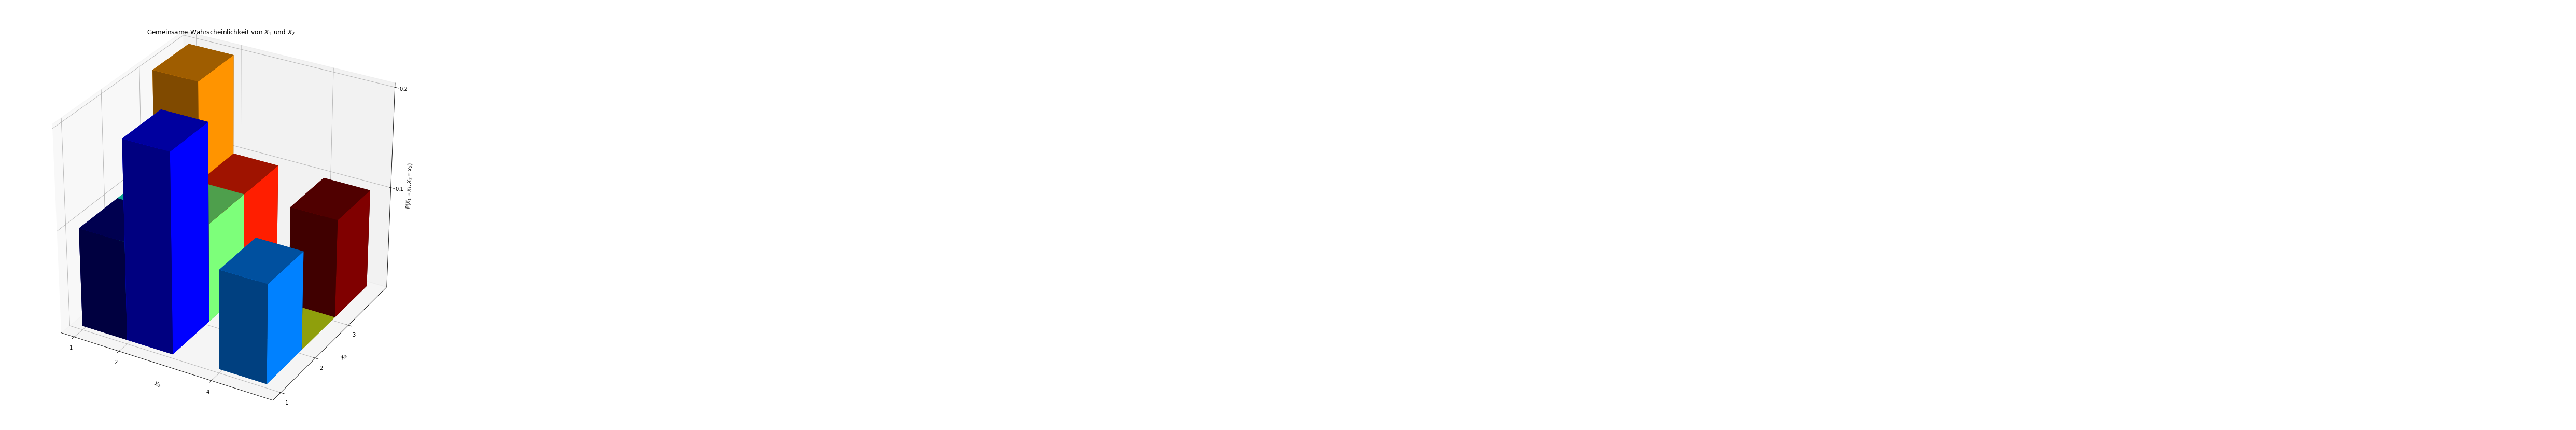

In [42]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

_x, _y = np.meshgrid(X1, X2)
x, y = _x.ravel(), _y.ravel()
top = X1X2.T.ravel()

colors = plt.cm.jet(np.linspace(0,1,len(top)))

ax.bar3d(x, y, np.zeros_like(top), 1, 1, top, 
         color=colors, shade=True)
ax.set_xticks([1, 2, 4])
ax.set_yticks([1, 2, 3])
ax.set_zticks([0.1, 0.2])
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$P(X_1 = x_1, X_2 = x_2)$")
ax.set_title("Gemeinsame Wahrscheinlichkeit von $X_1$ und $X_2$")

In [39]:
len(top)

9